**INSTRUCTIONS**



1.  The assignment contains four questions. A few bonus questions are mentioned. 
2.   This assignment is due on **6th Feb, 23:59 **(**No Further extensions**).
3.   Assignment must be implemented in Python 3 only.
4.   You are allowed to use libraries for data preprocessing (numpy, pandas etc) and for evaluation metrics, data visualization (matplotlib etc.).
5.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
6.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
7.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
8.   Any attempts at **plagiarism will be penalized heavily**.
9.   Make sure you run and save your notebooks before submission.
10.  For question 3 of the Decision Trees section, output your model's depth first traversal into ```outputimp.txt``` and submit it along with the ipynb file.
10. Naming convention for the ipynb file is ```<roll_number>_assign1.ipynb```
11. Compress your submission files into a zip file with the naming convention: ```<roll_number>_assign1.zip``` and submit in the portal.

#**1) REGRESSION**

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [10]:
# To read data from diamonds.csv
import pandas as pd
pd.options.mode.chained_assignment = None
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
diamond_data = pd.read_csv('diamonds.csv', na_values='?',    
         header=None,  names = headers) 
diamond_data = diamond_data.reset_index(drop=True)
diamond_data = diamond_data.iloc[1:]
diamond_data.describe()
#print(data) 

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940
unique,273,5,7,8,184,127,11602,554,552,375
top,0.3,Ideal,G,SI1,62,56,605,4.37,4.34,2.7
freq,2604,21551,11292,13065,2239,9881,132,448,437,767




```
# This is formatted as code
```

**KNN Regression [Diamond Price Prediction Dataset]**

1. a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

In [19]:
# code for knn regression
class knn :
    
    def __init__(self,dummy=0):
        self.dummy = dummy
    
    
    def fit(self,train_features,train_predictions,test_features,test_predictions,metrics,k=5,classifier=1) :
        
        self.train_features = train_features
        self.train_predictions = train_predictions.to_numpy()
        self.test_features = test_features
        self.test_predictions = test_predictions
        self.metrics = metrics
        self.k = k
        self.classifier = classifier
        if self.metrics == "manhattan" :
            
            algo_predictions = self._manhattan_predictions()
            
            return algo_predictions
        
        if self.metrics == "euclidean":
            
            algo_predictions = self._euclidean_predictions()
            return algo_predictions
        
        if self.metrics == "hamming" :
            
            algo_predictions = self._hamming_predictions()
            return algo_predictions
    
    def _hamming_predictions(self) :
        
        pred_value_array = []
        for i in range(len(self.test_features)):
            
            dummy_array = np.array(self.test_features[i])
            dummy_array = np.resize(dummy_array,(len(self.train_features),len(self.train_features[0])))
            
            dummy_array = dummy_array - self.train_features
            
            counts_array = np.count_nonzero(dummy_array,axis=1,keepdims = True)
            idx = np.argpartition(counts_array,self.k,axis = 0)
            
            if self.classifier == 0 :
                
                sum_local = 0
                for i in range(self.k) :
                    sum_local = sum_local + int(self.train_predictions[idx[i]])
                
                sum_local = sum_local/self.k
                pred_value_array.append(sum_local)
            
        return np.array(pred_value_array)
            
            
    
    def _euclidean_predictions(self) :
        
        square_of_features = np.square(self.train_features)
        square_sum_of_features = np.sum(square_of_features,axis = 1,keepdims = True)
        square_of_test = np.square(self.test_features)
        square_sum_of_test = np.sum(square_of_test,axis = 1,keepdims = True)
        
        transpose_of_train = self.train_features
        transpose_of_train = np.transpose(transpose_of_train)
        
        pred_value_array = []
        
        
        for i in range(len(square_sum_of_test)):
            
            dummy_array = np.array(square_sum_of_test[i])
            dummy_array = np.resize(dummy_array,(len(square_sum_of_features),1))
            dummy_array = dummy_array + square_sum_of_features
            
            dummy_array_2 = self.test_features[i]
            dummy_array_2 = np.array(dummy_array_2)
            
            #print(dummy_array_2.shape)
            #print(transpose_of_train.shape)
            dummy_array_2 = np.dot(dummy_array_2,transpose_of_train)
            #print(dummy_array_2.shape)
            
            dummy_array_2 = dummy_array_2 * 2
            dummy_array_2 = np.reshape(dummy_array_2,(len(dummy_array_2),1))
            #print(dummy_array_2.shape)
            #print(dummy_array.shape)
            
            dummy_array = dummy_array - dummy_array_2
            
            #print(dummy_array.shape)
            dummy_array = np.abs(dummy_array)
            #print(dummy_array.shape)
            
            idx = np.argpartition(dummy_array,self.k,axis = 0)
            
            if self.classifier == 0 :
                sum_local = 0
                for i in range(self.k):
                    sum_local = sum_local + int(self.train_predictions[idx[i]])
                
                sum_local = sum_local / self.k
                pred_value_array.append(sum_local)
            
        return np.array(pred_value_array)
            
            
            
            
        
    def _manhattan_predictions(self) :
        
        features_sum = np.sum(self.train_features,axis = 1,keepdims = True)
        pred_sum = np.sum(self.test_features,axis=1,keepdims = True)
        
        pred_value_array = []
        for i in range(len(pred_sum)) :
            
            dummy_array = np.array(pred_sum[i])
            dummy_array = np.resize(dummy_array,(len(features_sum),1))
            
            dummy_array = dummy_array - features_sum
            dummy_array = np.abs(dummy_array)
            
            #print(dummy_array.shape)
            idx = np.argpartition(dummy_array,self.k,axis=0)
            
            
            if self.classifier == 0 :
                
                sum_local = 0
                for j in range(self.k):
                    
                    sum_local = sum_local + int(self.train_predictions[idx[j]])
                    
                
                sum_local = sum_local/self.k
                
                pred_value_array.append(sum_local)
            
        
        return np.array(pred_value_array)
                    
        
        
        
        
"""
#preprocessing of data
diamond_data.cut.replace(["Ideal","Fair","Good","Very Good","Premium"],[1,2,3,4,5],inplace = True)
diamond_data.color.replace(["D","E","F","G","H","I","J"],[7,6,5,4,3,2,1],inplace = True)
diamond_data.clarity.replace(["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"],[1,2,3,4,5,6,7,8],inplace = True)


diamond_features,diamond_pred = diamond_data.iloc[:,[0,1,2,3,4,5,7,8,9]],diamond_data.iloc[:,6]
diamond_features_train,diamond_features_test,diamond_pred_train,diamond_pred_test = train_test_split(diamond_features,diamond_pred,test_size = 0.02)


diamond_norm = MinMaxScaler().fit(diamond_features_train)
diamond_features_train_norm = diamond_norm.transform(diamond_features_train)
diamond_features_test_norm = diamond_norm.transform(diamond_features_test)

my_knn = knn()
my_knn.fit(diamond_features_train_norm,diamond_pred_train,diamond_features_test_norm,diamond_pred_test,"euclidean",5,0)
"""


'\n#preprocessing of data\ndiamond_data.cut.replace(["Ideal","Fair","Good","Very Good","Premium"],[1,2,3,4,5],inplace = True)\ndiamond_data.color.replace(["D","E","F","G","H","I","J"],[7,6,5,4,3,2,1],inplace = True)\ndiamond_data.clarity.replace(["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"],[1,2,3,4,5,6,7,8],inplace = True)\n\n\ndiamond_features,diamond_pred = diamond_data.iloc[:,[0,1,2,3,4,5,7,8,9]],diamond_data.iloc[:,6]\ndiamond_features_train,diamond_features_test,diamond_pred_train,diamond_pred_test = train_test_split(diamond_features,diamond_pred,test_size = 0.02)\n\n\ndiamond_norm = MinMaxScaler().fit(diamond_features_train)\ndiamond_features_train_norm = diamond_norm.transform(diamond_features_train)\ndiamond_features_test_norm = diamond_norm.transform(diamond_features_test)\n\nmy_knn = knn()\nmy_knn.fit(diamond_features_train_norm,diamond_pred_train,diamond_features_test_norm,diamond_pred_test,"euclidean",5,0)\n'

1. b) Do we need to normalise data? [If so Does it make any difference?].


In [ ]:
# give proper explanation
If suppose there are 3 features for a dataset a,b and c and c generally occurs in multiples of 10 and b in multiples of 1.
Then the distance between a point(0,1,10) and (0,2,10) is same as (0,1,10) and (0,1,20) . But if we calculate the distance then 
(0,1,10) and (0,1,20) will not be same . If we normalize the data then these points will be equidistant.

2. Experiment with different distance measures[Euclidean distance, Manhattan distance, Hamming Distance] to handle categorical attributes.

In [20]:
# show all the experiments

#preprocessing of data


diamond_data.cut.replace(["Ideal","Fair","Good","Very Good","Premium"],[1,2,3,4,5],inplace = True)
diamond_data.color.replace(["D","E","F","G","H","I","J"],[7,6,5,4,3,2,1],inplace = True)
diamond_data.clarity.replace(["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"],[1,2,3,4,5,6,7,8],inplace = True)


diamond_features,diamond_pred = diamond_data.iloc[:,[0,1,2,3,4,5,7,8,9]],diamond_data.iloc[:,6]
diamond_features_train,diamond_features_test,diamond_pred_train,diamond_pred_test = train_test_split(diamond_features,diamond_pred,test_size = 0.02)


diamond_norm = MinMaxScaler().fit(diamond_features_train)
diamond_features_train_norm = diamond_norm.transform(diamond_features_train)
diamond_features_test_norm = diamond_norm.transform(diamond_features_test)


my_knn = knn()
pred_manhattan = my_knn.fit(diamond_features_train_norm,diamond_pred_train,diamond_features_test_norm,diamond_pred_test,"manhattan",5,0)
# #diamond_pred_test = diamond_pred_test.astype(int)

my_knn_2 = knn()
pred_euclidean = my_knn_2.fit(diamond_features_train_norm,diamond_pred_train,diamond_features_test_norm,diamond_pred_test,"euclidean",5,0)

my_knn_3 = knn()
pred_hamming = my_knn_3.fit(diamond_features_train_norm,diamond_pred_train,diamond_features_test_norm,diamond_pred_test,"hamming",5,0)


#print("hi")

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mhtn_mse = mean_squared_error(diamond_pred_test,pred_manhattan,squared = False)
mhtn_mae = mean_absolute_error(diamond_pred_test,pred_manhattan)
mhtn_r2 = r2_score(diamond_pred_test,pred_manhattan)

eucl_mse = mean_squared_error(diamond_pred_test,pred_euclidean,squared = False)
eucl_mae = mean_absolute_error(diamond_pred_test,pred_euclidean)
eucl_r2 = r2_score(diamond_pred_test,pred_euclidean)

hamming_mse = mean_squared_error(diamond_pred_test,pred_hamming,squared = False)
hamming_mae = mean_absolute_error(diamond_pred_test,pred_hamming)
hamming_r2 = r2_score(diamond_pred_test,pred_hamming)


#print(mhtn_mse," ",mhtn_mae," ",mhtn_r2)
#print(eucl_mse," ",eucl_mae," ",eucl_r2)
#print(hamming_mse," ",hamming_mae," ",hamming_r2)



3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [21]:
# report a table
from tabulate import tabulate
print(tabulate([['Manhattan',mhtn_mse,mhtn_mae,mhtn_r2],['Euclidean',eucl_mse,eucl_mae,eucl_r2],['Hamming',hamming_mse,hamming_mae,hamming_r2]], headers=['Distance Metrics','Mean-Squared-Error','Mean-Absolute-Error','R-squared(R2)', 'Age'], tablefmt='orgtbl'))

| Distance Metrics   |   Mean-Squared-Error |   Mean-Absolute-Error |   R-squared(R2) |
|--------------------+----------------------+-----------------------+-----------------|
| Manhattan          |             4036.11  |              2994.86  |      -0.0455652 |
| Euclidean          |              613.781 |               335.906 |       0.97582   |
| Hamming            |             2444.72  |              1169.98  |       0.616396  |


4.  a) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

In [22]:
# plot

k_values_list = [2,3,5,7,11,16]
r2_list = []

for k_value in k_values_list :
    
    my_knn = knn()
    pred_euclidean = my_knn.fit(diamond_features_train_norm,diamond_pred_train,diamond_features_test_norm,diamond_pred_test,"euclidean",k_value,0)
    r2_list.append(r2_score(diamond_pred_test,pred_euclidean))



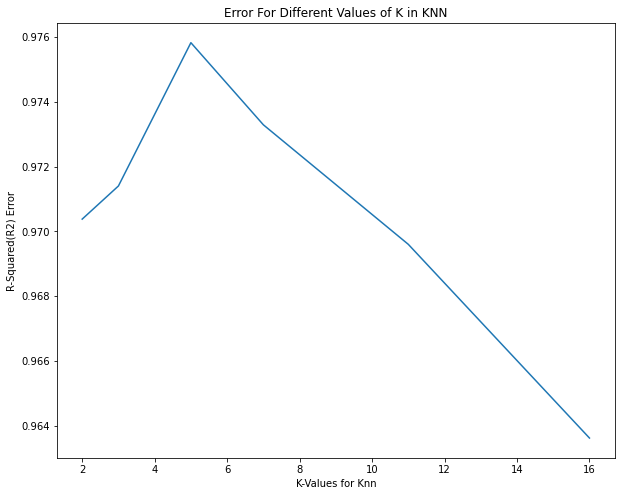

In [23]:
import matplotlib.pyplot as plt

plt.plot(k_values_list,r2_list)
plt.xlabel("K-Values for Knn")
plt.ylabel("R-Squared(R2) Error")
plt.title("Error For Different Values of K in KNN")
plt.show()

4. b) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

In [ ]:
# Explanation
The R-square values are almost same . They range in between 0.96-0.98 . We can identify the best K which has highest
R-square value . From the above graph we can say it is 5.

5. a) Also, report the performance of scikit-learn’s kNN regression algorithm.  

In [7]:
# scikit-learn KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

diamond_data_sk = diamond_data.copy()

diamond_data_sk.cut.replace(["Ideal","Fair","Good","Very Good","Premium"],[1,2,3,4,5],inplace = True)
diamond_data_sk.color.replace(["D","E","F","G","H","I","J"],[7,6,5,4,3,2,1],inplace = True)
diamond_data_sk.clarity.replace(["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"],[1,2,3,4,5,6,7,8],inplace = True)

keys = ["carat","depth","price","table","x","y","z"]
for x in keys:
    diamond_data_sk[x] = [float(item) for item in diamond_data_sk[x]]
    

diamond_data_sk_features = diamond_data_sk.drop('price',axis=1)
diamond_data_sk_ans = diamond_data_sk['price']

diamond_sk_norm = MinMaxScaler().fit(diamond_data_sk_features)
diamond_data_sk_features = diamond_norm.transform(diamond_data_sk_features)
#diamond_features_test_norm = diamond_norm.transform(diamond_features_test)

diamond_sk_train_features,diamond_sk_test_features,diamond_sk_train_ans,diamond_sk_test_pred = train_test_split(diamond_data_sk_features,diamond_data_sk_ans,test_size=0.2)
# diamond_sk_train_features.to_numpy()
# diamond_sk_train_ans.to_numpy()
# diamond_sk_test_features.to_numpy()
# diamond_sk_test_pred.to_numpy()

diamond_sklearn_reg = KNeighborsRegressor(n_neighbors=5)

diamond_sklearn_reg.fit(diamond_sk_train_features,diamond_sk_train_ans)
sk_pred = diamond_sklearn_reg.predict(diamond_sk_test_features)
mse_error = mean_squared_error(diamond_sk_test_pred,sk_pred,squared = False)
mae_error = mean_absolute_error(diamond_sk_test_pred,sk_pred)
r2_error = r2_score(diamond_sk_test_pred,sk_pred)

print(mse_error," ",mae_error," ",r2_error)


708.0589937825146   360.7828513162773   0.9684562005249442


5. b) Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

In [ ]:
# Comparison
When I have used "euclidean distance" as distance metric , I have got 0.97 as the R2 score for my knn .
The KNeighbors Regressor of sklearn library got the R2 score of 0.96 .

6. From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?


In [ ]:
# report this  along with the experiments

Advantages of KNN :- 
    
1] Training time is zero
2] Can easily add and remove data
3] Very easy to implement

Disadvantages of KNN :-
    
1] Scaling of the data is required for effective calculation of distance.
2] Finding the K-nearest neighbours will be very slow as we have to calculate distance with every data point in the
dataset.
3] Finding the K-nearest neighbours will also be slow if we have many features.



# **2)** **Linear Regression**

Dataset - same as above (Diamond Price Detection)


2a) Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.


In [67]:
class my_linear_regression():
    
    def __init__(self,dummy=0) :
        self.dummy = dummy
    
    def fit(self,training_features,predictions,learning_rate = 0.1,iterations = 50) :
        
        self.training_features = training_features
        self.predictions = predictions
        self.learning_rate = learning_rate
        self.iterations = iterations
        self._train()
    
    def _train(self) :
        
        x_train = self.training_features
        x_train = np.transpose(x_train)
        y_train = self.predictions
        y_train = y_train.to_numpy()
        #dummy_array_2 = np.reshape(dummy_array_2,(len(dummy_array_2),1))
        y_train = np.reshape(y_train,(y_train.shape[0],1))
        y_train = np.transpose(y_train)
        #print(type(y_train))
        #print(x_train.shape)
        #print(y_train.shape)
        
        n = x_train.shape[0]
        self.b = 0
        self.w = np.random.randn(1,n)
        cost_function = []
        for i in range(self.iterations) :
            #print(w.shape)
            #print(x_train.shape)
            z = np.dot(self.w,x_train)
            z = z + self.b
            #print(z.shape)
            cost_array = z - y_train
            cost_array = np.square(z-y_train)
            overall_cost = np.sum(cost_array)
            overall_cost = overall_cost / (2*y_train.shape[1])
            #print("cost function in iteration ",(i+1)," is",overall_cost)
            cost_function.append(overall_cost)
            cost_array = z - y_train
            cost_array = cost_array / (y_train.shape[1])
            #print(cost_array.shape)
            #print(self.training_features.shape)
            slope_w = np.dot(cost_array,self.training_features)
            correction_b = np.sum(slope_w)
            slope_w = slope_w * self.learning_rate
            self.w = self.w - slope_w
            correction_b = self.learning_rate*correction_b
            self.b = self.b - correction_b
        
        plt.plot(cost_function)
        plt.grid()
        plt.show()
    
    def predict(self,test_features):
        
        test_features = np.transpose(test_features)
        test_predictions = np.dot(self.w,test_features)
        test_predictions = test_predictions + self.b
        test_predictions = np.transpose(test_predictions)
        
        return test_predictions

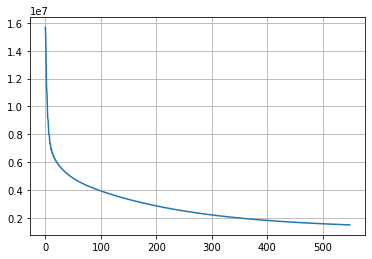

1739.7867281770984   1189.891330660806   0.8095560664106326


In [84]:
my_regression = my_linear_regression()
my_regression.fit(diamond_sk_train_features,diamond_sk_train_ans,0.4,550)
algo_pred = my_regression.predict(diamond_sk_test_features)


mse_error = mean_squared_error(diamond_sk_test_pred,algo_pred,squared = False)
mae_error = mean_absolute_error(diamond_sk_test_pred,algo_pred)
r2_error = r2_score(diamond_sk_test_pred,algo_pred)

print(mse_error," ",mae_error," ",r2_error)

2b) What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.

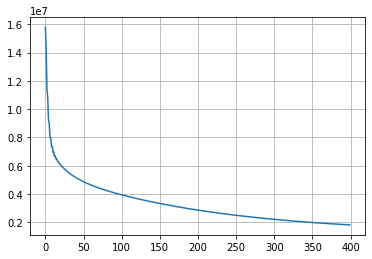

1888.5400317396147   1288.1001457436791   0.7699982684640108


In [85]:
#code for Correlation between features and the Diamond Price.
#.corr()

column_head = list(diamond_data_sk.columns)
column_head.remove('price')
#diamond_data_sk_features.corr()
corr_df = pd.DataFrame(diamond_data_sk_features,columns=column_head)
corr_df.corr()
corr_features_train,corr_features_test,corr_train_val,corr_test_val = train_test_split(corr_df,diamond_data_sk_ans,test_size=0.2)
# print(corr_features_train.shape)
# print(corr_train_val.shape)
# print(corr_features_test.shape)
# print(corr_test_val.shape)


corr_model =  my_linear_regression()
corr_model.fit(corr_features_train,corr_train_val,0.4,400)
algo_pred_1 = corr_model.predict(corr_features_test)


mse_error = mean_squared_error(corr_test_val,algo_pred_1,squared = False)
mae_error = mean_absolute_error(corr_test_val,algo_pred_1)
r2_error = r2_score(corr_test_val,algo_pred_1)

print(mse_error," ",mae_error," ",r2_error)

#carat value is correlated with x,y,z values of the dataset . So we can remove them and can use for prediction

Explanation for 2b) - 

2c) Use the module Linear Regression from sklearn to predict the price of diamonds(considering the same attributes as before) and compare the result obtained with the above. 


In [11]:
# import sklearn model

from sklearn.linear_model import LinearRegression
corr_regressor = LinearRegression()
#corr_features = corr_df.to_numpy()
corr_regressor.fit(corr_features_train,corr_train_val)
corr_regressor.score(corr_features_test,corr_test_val)

0.9059024569660248

2d) Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? Adding extra features did it make the prediction better or worse.Comment? 


In [12]:
normal_regressor = LinearRegression()
normal_regressor.fit(diamond_sk_train_features,diamond_sk_train_ans)
normal_regressor.score(diamond_sk_test_features,diamond_sk_test_pred)

0.9013646279369397

2e) Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics. 


Explanation - The R-square score for Linear Regression which I have created is 0.80 and for the K-NN value it is 0.97 . I believe that Linear Regression is than K-NN because I think there is overfitting of data in K-NN because of the high R-square value .

2f) Plot the predicted values from KNN regression, Linear Regression and Actual Diamond Price.


In [83]:
#plot 
my_knn_4 = knn()
pred_euclidean = my_knn_4.fit(diamond_features_train_norm,diamond_pred_train,diamond_features_test_norm,diamond_pred_test,"euclidean",16,0)



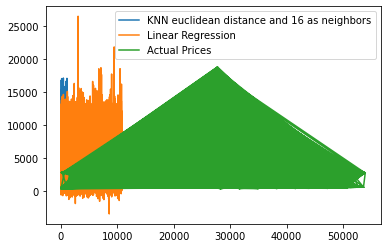

In [86]:
plt.plot(pred_euclidean,label = "KNN euclidean distance and 16 as neighbors")
plt.plot(algo_pred,label = "Linear Regression ")
plt.plot(diamond_sk_test_pred, label = "Actual Prices")
plt.legend()
plt.show()

#**KNN Classifier**

In this problem you are required to train, test and validate a K-Nearest Neighbor Classifier on the famous CIFAR-10 dataset. The next few cells will guide you through the process. Follow along...

In [2]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
# Download the dataset
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

--2021-02-09 16:06:55--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  1.76MB/s    in 83s     

2021-02-09 16:08:18 (1.96 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [4]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))
  
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

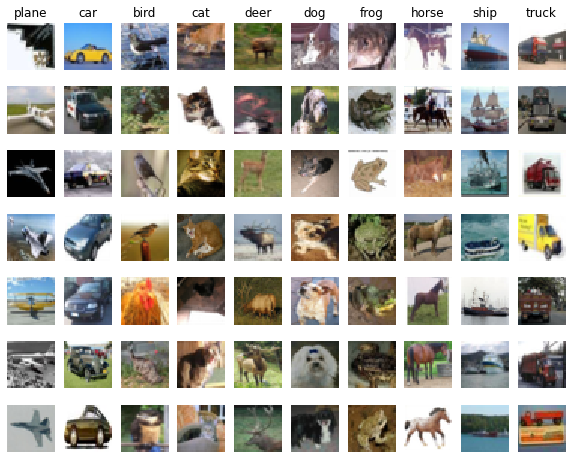

In [5]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [6]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In the next cell you are going to implement the main KNearestNeighbor class and keep adding functions to it as and when required in the subsequent steps.

In [7]:
# You will keep coming back to this cell to add more functions as and when
# required. Right now it is very simple!
class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """

    def __init__(self):
        pass
    
    def train(self,train_features,train_classes):
        
        self.train_features = train_features
        self.train_classes = train_classes

    def compute_distances_two_loops(self,test_features):
        square_of_features = np.square(self.train_features)
        square_sum_of_features = np.sum(square_of_features,axis=1,keepdims = True)
        square_of_test = np.square(test_features)
        square_sum_of_test = np.sum(square_of_test,axis=1,keepdims = True)
        transpose_of_train = self.train_features
        transpose_of_train = np.transpose(transpose_of_train)
        return_array = []
        
        for i in range(len(square_sum_of_test)):
            dummy_array = np.array(square_sum_of_test[i])
            dummy_array = np.resize(dummy_array,(len(square_sum_of_features),1))
            dummy_array = dummy_array + square_sum_of_features
            dummy_array_2 = test_features[i]
            dummy_array_2 = np.array(dummy_array_2)
            dummy_array_2 = np.dot(dummy_array_2,transpose_of_train)
            dummy_array_2 = dummy_array_2 * 2
            dummy_array_2 = np.reshape(dummy_array_2,(len(dummy_array_2),1))
            dummy_array = dummy_array - dummy_array_2
            dummy_array = np.abs(dummy_array)
            dummy_array = np.sqrt(dummy_array)
            dummy_array = np.transpose(dummy_array)
            return_array.append(dummy_array)
        
        return pd.DataFrame(np.concatenate(return_array))
    
    """
    def predict_labels(self,dist,k=5):
        
        print("hi")
        return None
        #our_pred_array = []
        
        for i in range(dist.shape[0]) :
            arr = dist[i]
            arr = np.array(arr)
            print(arr.shape)
            break
            
            idx = np.argpartition(arr,k,axis = 1)
            
            local_pred = []
            for j in range(k) :
                local_pred.append(self.train_classes[idx[j]])
            
            local_pred = np.array(local_pred)
            counts = np.bincount(local_pred)
            our_pred_array.append(np.argmax(counts))
        #return np.array(our_pred_array)
    """
        

    def predict_labels(self,dist,k=5) :
    
        our_pred_array = []
        
        for i in range(dist.shape[0]):
            arr = dist[i]
            arr = np.array(arr)
            idx = np.argpartition(arr,k,axis=0)
            local_pred = []
            for j in range(k):
                local_pred.append(self.train_classes[idx[j]])
            
            local_pred = np.array(local_pred)
            counts = np.bincount(local_pred)
            our_pred_array.append(np.argmax(counts))
            
        return np.array(our_pred_array)
        

Go back to KNearestNeighbor class and add a method to train the classifier. Your function will be called as below. In KNN classifier, this step is a simple memorization of the training data.

In [8]:
# Make sure to add train() in the classifier class before executing this cell
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

Go back to KNearestNeighbor class and add a method to compute distances between each pair of test image and train image. You can use two loops to do this. Remember we are using standard L-2 distance metric. Precisely your method should return a distance matrix($D$) where $D(i,j)$ = **L-2** distance between the $i^{th}$ test image and the $j^{th}$ train image. Your function will be called as below

In [11]:
# Make sure to add compute_distances_two_loops() in the classifier class 
# before executing this cell
dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)

(500, 5000)


Next implement the function to predict labels. Again go back to the KNearestNeighbor class cell. Your function will be called as below

In [12]:
# Make sure to add predict_labels() in the classifier class 
# before executing this cell
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 42 / 500 correct => accuracy: 0.084000


In [13]:
# Use this cell to compute accuracies for k = 3, 5, 7
y_test_pred_3 = classifier.predict_labels(dists,k=3)
y_test_pred_5 = classifier.predict_labels(dists,k=5)
y_test_pred_7 = classifier.predict_labels(dists,k=7)

num_correct = np.sum(y_test_pred_3 == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f when used k as 3' % (num_correct, num_test, accuracy))

num_correct = np.sum(y_test_pred_5 == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f when used k as 5' % (num_correct, num_test, accuracy))

num_correct = np.sum(y_test_pred_7 == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f when used k as 7' % (num_correct, num_test, accuracy))

Got 53 / 500 correct => accuracy: 0.106000 when used k as 3
Got 49 / 500 correct => accuracy: 0.098000 when used k as 5
Got 51 / 500 correct => accuracy: 0.102000 when used k as 7


Now we have a basic classifier ready but it is extremely inefficient. In Machine Learning writing vectorised code is one of the most important skills. 

Now you have to again go back to the KNearestNeighbor class cell and add functions to compute the distance matrix using:
1.   single loop
2.   no loops

From here onwards we won't do as much hand holding as done before. You are expected to write all the code from scratch



In [17]:
# Use this cell to call the functions





Time Taken to compute when k=3 is  0.03696107864379883
Time Taken to compute when k=5 is  0.03027939796447754
Time Taken to compute when k=7 is  0.023533344268798828


Next, you are required to tabulate the time taken to compute the distance matrix using each of the three above methods implemented for k = 1, 3, 5, 7.

In [24]:
# Use this cell to present your timing results for computing distance matrix

import time 

start_time = time.time()
y_test_pred_3 = classifier.predict_labels(dists,k=3)
end_time = time.time()

print("Time Taken to compute when k=3 is ",end_time-start_time,"and test data size is ",y_test.shape[0])

start_time = time.time()
y_test_pred_5 = classifier.predict_labels(dists,k=5)
end_time = time.time()

print("Time Taken to compute when k=5 is ",end_time-start_time," and test data size is ",y_test.shape[0])

start_time = time.time()
y_test_pred_7 = classifier.predict_labels(dists,k=7)
end_time = time.time()

print("Time Taken to compute when k=7 is ",end_time-start_time," and test data size is ",y_test.shape[0])

Time Taken to compute when k=3 is  0.03759932518005371 and test data size is  500
Time Taken to compute when k=5 is  0.03382444381713867  and test data size is  500
Time Taken to compute when k=7 is  0.023112773895263672  and test data size is  500


As you can see that in KNN algorithm it is important to tune the hyperparameter K. We will do this using Cross Validation Leave One Out approach. The idea is to split the train set into few folds(here we recommend you to set the fold number to 5). Then, for each value of K, we leave one of these folds out to evaluate performance but use the others to train. Repeat this by leaving each fold out once. You will get 5 accuracies in this case, one for leaving out each fold. Depending on the average accuracy decide on the optimal value of K. Report the same. We also expect you to present plots showing the average accuracy and standard deviation for each value of K.

In [ ]:
# Use this cell to implement Cross Validation

In this last part of the notebook you are expected to do the following and present appropriate reports/results:

1. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels in all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
2. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels at that position from all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
3. What is the time complexity of training using KNN classifier? What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?
4. Bonus: Explore what image features you can use to better the performance of KNN classifier.




# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```


In [4]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
data.describe()
data.head()

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


1. a) Implement a decision tree(from scratch using only python data structures) as a class.

In [87]:
"""
import pandas as pd
import numpy as np

class Node :
    
    def __init__(self,max_pred_class) :
        
        self.left_node = None
        self.right_node = None
        self.max_pred_class = max_pred_class
        self.threshold = 0
        self.feature_index = 0
        

class DecisionTree :
    
    def __init__(self,metrics) :
        
        #self.df = df
        self.metrics = metrics
    
    def _split_features(self,features,prediction):
        
        if len(prediction) < 2 :
            return None,None
        
        total_sample_size = len(prediction)
        
        count_list = []
        for i in self.labels :
            count_list.append(int(np.sum(prediction == i)))
        
        if self.metrics == "gini_index" :
            #print("hi")
            
            overall_gini_index = 1
            for num in count_list :
                
                sq = (num/total_sample_size)**2
                overall_gini_index = overall_gini_index - sq
            
            #print(overall_gini_index)
            
            return_index = None
            return_threshold = None
            """
            """
            for i in range (self.features.shape[1]) :
                thres,classes = zip(*sorted(zip(features[:, i], prediction)))
                print(thres)
                print(classes)
                print("------")
            """
            """
        
            
        elif self.metrics == "entropy" :
            print("entropy")
        
        return None,None
    
    def _build_decision_tree(self,features,prediction,node_depth = 1) :
        
        sample_per_label = []
        for i in self.labels :
            #print(np.sum(self.prediction == i)," ",i)
            sample_per_label.append(np.sum(prediction == i))
        
        max_class = np.argmax(sample_per_label) #returns index number , match it with self.labels
        max_class = list(self.labels)[max_class]
        #print(max_class)
        node = Node(max_class)
        
        if node_depth <= self.max_depth :
            
            index_split , threshold_value = self._split_features(features,prediction)
        
        
        
            
    
    def fit(self,features,prediction,max_depth = 100) :
        
        #prediction col name must be "label"
        prediction.columns = ["label"]
        #print(len(set(prediction.label.unique())))
        #print(features.shape[1])
        self.features = features
        self.prediction = prediction
        self.classes = len(set(prediction.label.unique()))
        self.labels = list(set(prediction.label.unique()))
        self.features_shape = features.shape[1]
        self.max_depth = max_depth
        self.tree = self._build_decision_tree(features,prediction)
        
        

    


x,y = data.iloc[:,:-1],data.iloc[:,[-1]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

decision_tree = DecisionTree("gini_index")
decision_tree.fit(x_train,y_train)
"""

IndentationError: unexpected indent (<ipython-input-87-df152ed8a193>, line 48)

In [64]:
import numpy as np
class decision_tree_node :
    
    def __init__(self,left_branch=None,right_branch = None,best_split = [],leaf = 0,ans = None):
        
        self.leaf = leaf
        
        if self.leaf == 0 :
            self.left_branch = left_branch
            self.right_branch = right_branch
            self.best_split = best_split
        
        else :
            self.best_split = best_split
            self.ans = ans
class decision_tree :
    
    def __init__(self,dummy = 0) :
        self.dummy = dummy
        self.root_node = None
    
    def fit(self,train_data,metrics = "gini",max_depth = 5) :
        self.train_data = train_data
        self.metrics = metrics
        self.max_depth = max_depth
        self.columns = list(self.train_data.columns)
        
        #print(self.train_data['labels'].value_counts())
        
        #if self.metrics == "gini" :
        self.root_node = self._build_tree(self.train_data,0)
           
    
    def _build_tree(self,train_data,depth) :
        
        if depth >= self.max_depth :
            
            #print("Max depth ans ",train_data['labels'].value_counts().idxmax())
            return decision_tree_node(leaf = 1,ans = int(train_data['labels'].value_counts().idxmax()))
        
        if self._is_single_class(train_data) == True :
            
            #print("Single class ",train_data['labels'].value_counts().idxmax())
            return decision_tree_node(leaf = 1, ans = int(train_data['labels'].value_counts().idxmax()))
        
        #best_gini,best_split = self._find_best_split_gini(train_data)
        best_gain,best_split = self._find_best_split(train_data)
        
        if best_gain == 0:
            
            #print("best gini ",best_split[1])
            return decision_tree_node(leaf = 1,ans = int(best_split[1]))
        
        left_rows,right_rows = self._split_data(train_data,best_split[0],best_split[1])
        
        left_node = self._build_tree(left_rows,depth+1)
        right_node = self._build_tree(right_rows,depth+1)
        
        return decision_tree_node(left_branch = left_node,right_branch = right_node,best_split = best_split)
        
        
    def _is_single_class(self,training_data) :
        
        if len(training_data['labels'].unique()) == 1 :
            return True
        
        return False
    
    def _find_best_split(self,training_data) :
        
        """
        data_set_impurity = 1
        
        label_counts = training_data['labels'].value_counts()
        label_counts = dict(label_counts)
        for lbl in label_counts :
            #print(lbl," ",label_counts[lbl])
            prob = label_counts[lbl]/len(training_data)
            prob = prob ** 2
            data_set_impurity = data_set_impurity - prob
        
        """
        
        #data_set_impurity = self._find_impurity(training_data)
        best_gain = 1
        best_split = []
        number_of_features = training_data.shape[1]-1
        #print(number_of_features)
        count = -1
        for col in training_data.columns :
            count = count + 1
            if count == number_of_features :
                break
            unique_values = training_data[col].unique()
            for val in unique_values :
                
                less_data , greater_data = self._split_data(training_data,count,val)
                
                if len(less_data) == 0 or len(greater_data) == 0 :
                    continue
                
                #gain_by_split = self._info_gain(less_data,greater_data,data_set_impurity)
                gain_by_split = self._find_impurity(training_data)
                
                if gain_by_split < best_gain :
                    best_gain = gain_by_split
                    best_split = [count,val]
                
        
        return best_gain,best_split
        #print(best_gain)
        #print(best_split)
 
    def _info_gain(self,less_data,greater_data,data_set_impurity) :
        
        """
        
        less_prob = less_data.shape[0]/(less_data.shape[0]+greater_data.shape[0])
        
        data_set_impurity = data_set_impurity - (less_prob * self._find_impurity(less_data))
        less_prob = 1 - less_prob
        data_set_impurity = data_set_impurity - (less_prob * self._find_impurity(greater_data))
        
        return data_set_impurity
        """
        pass
        
    def _find_impurity(self,training_data):
        
        """"
        data_set_impurity = 1
        
        label_counts = training_data['labels'].value_counts()
        label_counts = dict(label_counts)
        for lbl in label_counts :
            #print(lbl," ",label_counts[lbl])
            prob = label_counts[lbl]/len(training_data)
            prob = prob ** 2
            data_set_impurity = data_set_impurity - prob
        
        return data_set_impurity
        """
        
        values,count = np.unique(training_data['labels'],return_counts = True)
        p = count/count.sum()
        
        if self.metrics == "gini" :
            #values,count = np.unique(training_data['labels'],return_counts = True)
            #p = count/count.sum()
            return (1-np.sum(p**2))
        
        if self.metrics == "missclassification" :
            return (1 - np.max(p))
        
        #values,count = np.unique(training_)
        
        if self.metrics == "entropy" :
            
            return sum(p* - np.log2(p))
        
    def _split_data(self,training_data,col_num,val):
        
        #print(col_num)
        #print(val)
        
        less_data = []
        greater_data = []
        for i in range(training_data.shape[0]) :
            #print(training_data.iloc[i])
            list1 = list(training_data.iloc[i])
            #print(list1)
            if list1[col_num] >= val :
                
                greater_data.append(training_data.iloc[i])
            
            else :
                
                less_data.append(training_data.iloc[i])

        
        return pd.DataFrame(less_data,columns = training_data.columns),pd.DataFrame(greater_data,columns = training_data.columns)
    
    
    def print_tree(self,file_pointer):
        
        if self.root_node == None :
            
            print("NO tree")
        
        else :
            
            self._print_tree_2(self.root_node,file_pointer)
    
    def _print_tree_2(self,root_node,file_pointer,spacing = ""):
        
        if root_node.leaf == 1 :
            
            #print_str = " ".join(root_node.best_split)
            
            
            if len(root_node.best_split) == 2 :
                print_str = spacing + str(root_node.best_split[0])+ " "+str(root_node.best_split[1])
                #print(print_str)
                file_pointer.write(print_str+"\n")
            
            else :
                print_str = spacing + str(root_node.ans)
                #print(print_str)
                file_pointer.write(print_str+"\n")
        else :
            
            
            #print_str = spacing+"  " + str(root_node.best_split[0])+" "+str(root_node.best_split[1])
            print_str = spacing + "Is "+str(self.columns[root_node.best_split[0]])+" >= " +str(root_node.best_split[1])
            #print(print_str)
            #print(spacing+"False Branch")
            file_pointer.write(print_str+"\n")
            file_pointer.write(spacing+"False Branch"+"\n")
            self._print_tree_2(root_node.left_branch,file_pointer,spacing = spacing + "\t")
            #print(spacing+"True Branch")
            file_pointer.write(spacing+"True Branch"+"\n")
            self._print_tree_2(root_node.right_branch,file_pointer,spacing = spacing+"\t")
            
        
    def predict(self,test_data) :
        
        pred = []
        
        for i in range(test_data.shape[0]):
            pred.append(self._predict_class(list(test_data.iloc[i]),self.root_node))
            #break
        
        return np.array(pred)
    
    def _predict_class(self,test_data,root_node):
        
        if root_node.leaf == 1 :
            
            return root_node.ans
        
        col_num = int(root_node.best_split[0])
        col_val = int(root_node.best_split[1])
        
        if test_data[col_num] >= col_val :
            
            return self._predict_class(test_data,root_node.right_branch)
        
        return self._predict_class(test_data,root_node.left_branch)
        
        


1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

In [61]:
x,y = data.iloc[:,:-1],data.iloc[:,[-1]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
x_train['labels'] = y_train

# decision_tree_gini = decision_tree()
# decision_tree_gini.fit(x_train,"gini")
# pred_dt_gini = decision_tree_gini.predict(x_test)

# decision_tree_miss = decision_tree()
# decision_tree_miss.fit(x_train,"missclassification",max_depth = 6)
# pred_dt_miss = decision_tree_miss.predict(x_test)

# decision_tree_entropy = decision_tree()
# decision_tree_entropy.fit(x_train,"entropy",max_depth=4)
# pred_dt_entropy = decision_tree_entropy.predict(x_test)


<ipython-input-61-9979938ea1d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['labels'] = y_train


In [65]:
decision_tree_gini = decision_tree()
decision_tree_gini.fit(x_train,"gini")
pred_dt_gini = decision_tree_gini.predict(x_test)

decision_tree_miss = decision_tree()
decision_tree_miss.fit(x_train,"missclassification",max_depth = 6)
pred_dt_miss = decision_tree_miss.predict(x_test)

decision_tree_entropy = decision_tree()
decision_tree_entropy.fit(x_train,"entropy",max_depth=4)
pred_dt_entropy = decision_tree_entropy.predict(x_test)

1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

In [74]:
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import r2_score

# mse_error_gini = mean_squared_error(pred_dt_gini,y_test,squared = False)
# mae_error_gini = mean_absolute_error(pred_dt_gini,y_test)
# r2_error_gini = r2_score(pred_dt_gini,y_test)

# print(mae_error_gini," ",mae_error_gini," ",r2_error_gini)

from sklearn.metrics import confusion_matrix
from sklearn import metrics


print("Accuracy gini is ",metrics.accuracy_score(y_test,pred_dt_gini))
print("Accuracy missclassification is ",metrics.accuracy_score(y_test,pred_dt_miss))
print("Accuracy entropy is ",metrics.accuracy_score(y_test,pred_dt_entropy))
print(confusion_matrix(y_test,pred_dt_gini))
print(confusion_matrix(y_test,pred_dt_miss))
print(confusion_matrix(y_test,pred_dt_entropy))


Accuracy gini is  0.8685714285714285
Accuracy missclassification is  0.9142857142857143
Accuracy entropy is  0.8571428571428571
[[120   2]
 [ 21  32]]
[[119   3]
 [ 12  41]]
[[118   4]
 [ 21  32]]


1. d) Experiment with different approaches to decide when to terminate the tree(number of layers, purity measure, etc). Report and give explanations for all approaches. 

In [ ]:
As the number of layers or the depth of the tree increases , I'm observing that the accuracy is increasing.

1. e) Does standardisation and normalisation help in this case? Report

Answer: No . Standardisation and normalisation doesn't help in this case

2. Compare your trained model with a model trained by the scikit-learn DecisionTreeClassifier module. Compare accuracies.

In [73]:
from sklearn.tree import DecisionTreeClassifier
sk_dt = DecisionTreeClassifier()
x_new_train = x_train.iloc[:,:-1]
sk_dt = sk_dt.fit(x_new_train,y_train)
sk_dt_pred = sk_dt.predict(x_test)

print("Accuracy is ",metrics.accuracy_score(y_test,sk_dt_pred))


Accuracy is  0.9542857142857143


3. Output a depth first traversal of your decision tree in a file named ```outputimp.txt``` respectively in the following format and submit it along with the assignment.


```
<Node classification criteria in words.>
<Branch label>
  ... And so on, recursively.
```
 
For example,
a depth first search traversal for the below decision tree would be:

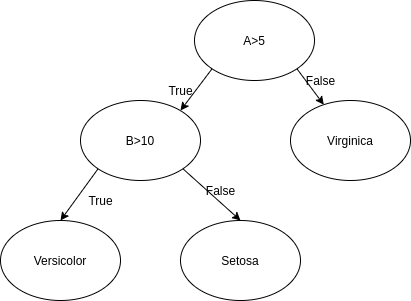
```
Is A>5?
True Branch
  Is B>10?
  True Branch
    Versicolor
  Is B>10?
  False Branch
    Setosa
Is A>5?
False Branch
	Virginica

```




In [67]:
file1 = open("outputimp.txt","w")
file1.write("Gini Index Tree"+"\n")
decision_tree_gini.print_tree(file1)
file1.write("\n"+"Entropy Tree "+"\n")
decision_tree_entropy.print_tree(file1)
file1.write("\n"+"Miss Classification Tree "+"\n")
decision_tree_miss.print_tree(file1)
file1.close()

4. Experiment with removing features that are redundant, highly correlated with other features and report accuracies of the resulting model. Explain your approach.

In [77]:
x.corr()  # UCShape and UCSize are corelated 

x1,y1 = data.iloc[:,[0,1,3,4,5,6,7,8]],data.iloc[:,[-1]]
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.25)
x1_train['labels'] = y1_train


decision_tree_gini_1 = decision_tree()
decision_tree_gini_1.fit(x1_train,"gini")
pred_dt_gini_1 = decision_tree_gini_1.predict(x_test)

decision_tree_miss_1 = decision_tree()
decision_tree_miss_1.fit(x1_train,"missclassification",max_depth = 6)
pred_dt_miss_1 = decision_tree_miss_1.predict(x1_test)

decision_tree_entropy_1 = decision_tree()
decision_tree_entropy_1.fit(x1_train,"entropy",max_depth=4)
pred_dt_entropy_1 = decision_tree_entropy_1.predict(x1_test)


print("Accuracy gini is ",metrics.accuracy_score(y1_test,pred_dt_gini_1))
print("Accuracy missclassification is ",metrics.accuracy_score(y1_test,pred_dt_miss_1))
print("Accuracy entropy is ",metrics.accuracy_score(y1_test,pred_dt_entropy_1))

<ipython-input-77-c73215719c1d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1_train['labels'] = y1_train


Accuracy gini is  0.56
Accuracy missclassification is  0.92
Accuracy entropy is  0.8628571428571429


5. Report the advantages and disadvantages of decision trees based on the above question.

Answer: Advantages :- 

1] We don't have to worry about normalizing/scaling the data.
2] Prediction of the new class is relatively faster when compared to KNN

Disadvantages :- 

1] A small change in train_data can lead to a totally different decision tree.
2] Training time for the decision tree is high.